In [615]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
import seaborn as sns

In [616]:
df=pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [617]:
df.shape

(4600, 18)

In [618]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

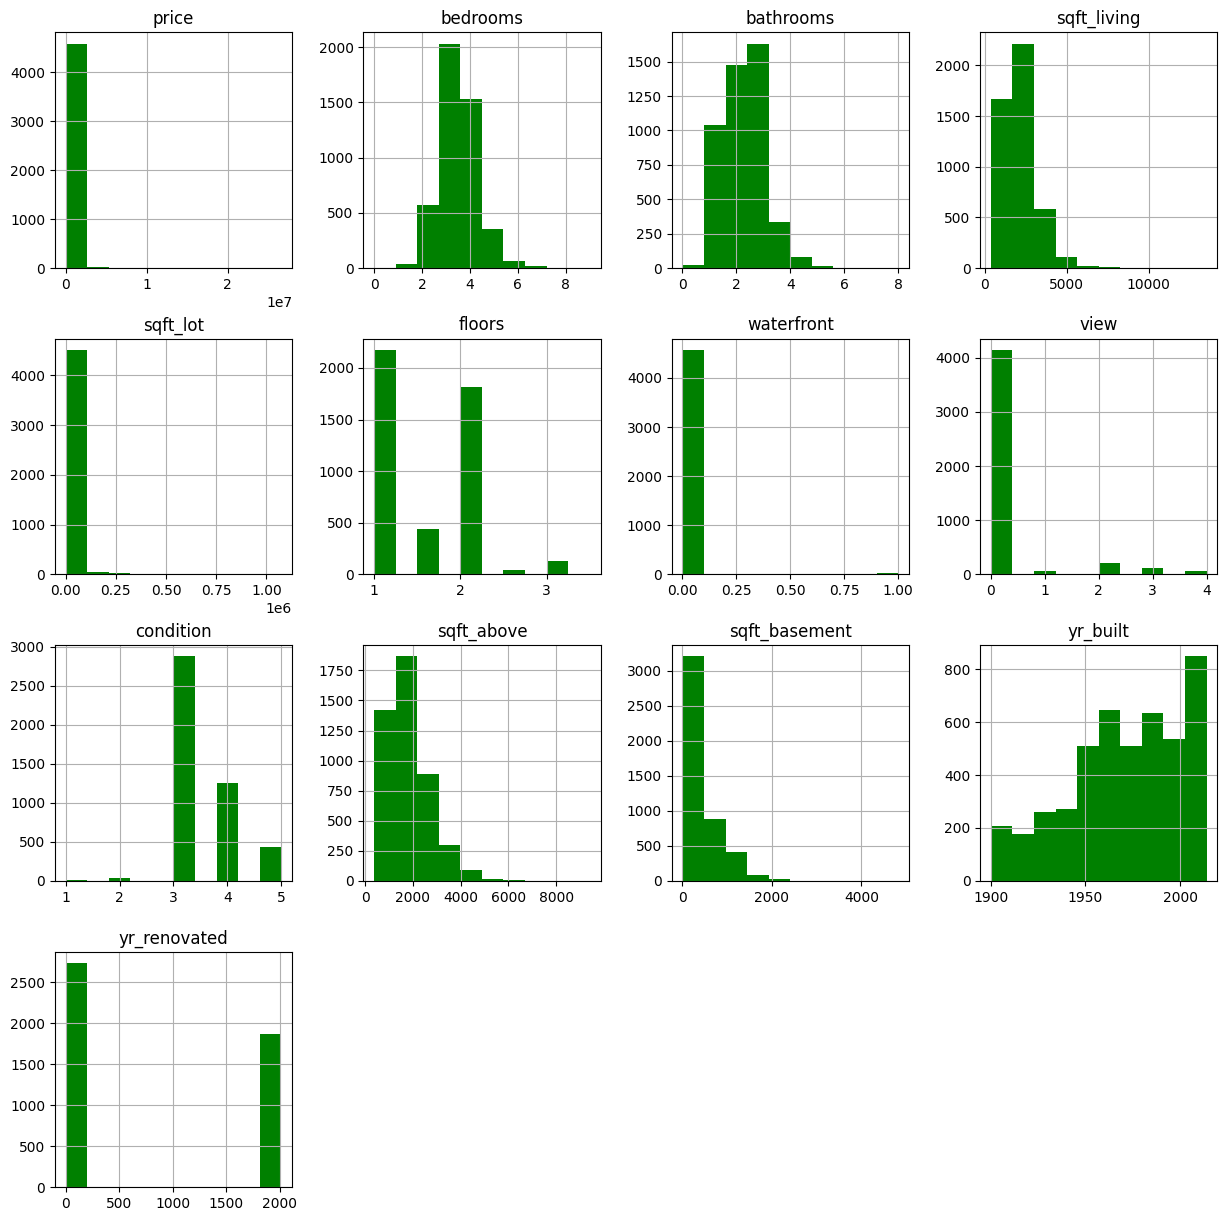

In [620]:
df.hist(figsize=(15, 15), xlabelsize=10, ylabelsize=10,color='green');

In [621]:
df.drop(['date','country'],axis=1,inplace=True)

In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(3)
memory usage: 575.1+ KB


In [623]:
label_encoder = LabelEncoder()

# Encode 'street' column
df['street_encoded'] = label_encoder.fit_transform(df['street'])

# Encode 'city' column
df['city_encoded'] = label_encoder.fit_transform(df['city'])

# Encode 'statezip' column
df['statezip_encoded'] = label_encoder.fit_transform(df['statezip'])

# Drop original categorical columns
df.drop(['street', 'city', 'statezip'], axis=1, inplace=True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street_encoded,city_encoded,statezip_encoded
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31


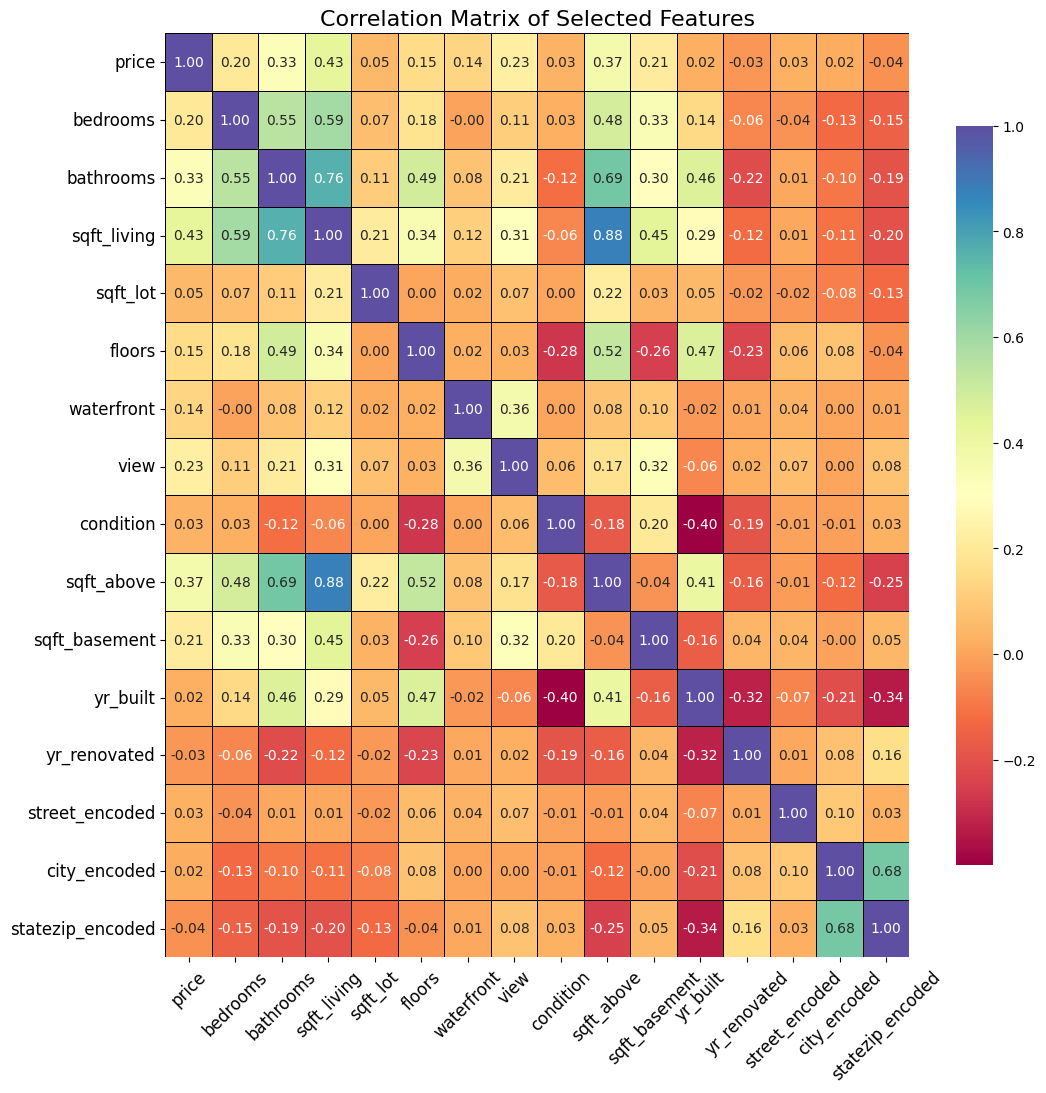

In [624]:
# Calculate the correlation matrix
corr_matrix = df.corr(method="pearson")

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Spectral', cbar_kws={'shrink': .8}, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Customize the plot
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

In [625]:
# Calculate Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the number of outliers removed
print(f"Number of outliers removed: {df.shape[0] - df_outliers_removed.shape[0]}")

# Now use df_outliers_removed for model training


Number of outliers removed: 1152


In [626]:
df2=corr_matrix.index[abs(corr_matrix['price'])>=0.05].tolist()
df2.remove('price')   
print(df2)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']


In [627]:
X = df_outliers_removed[df2]
y = df_outliers_removed['price']
scaler=StandardScaler()

In [628]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [629]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [630]:
y_pred=regressor.predict(X_test)

In [631]:
linear_regression_acc=r2_score(y_test,y_pred)
print(f'Linear Regression Test accuracy: {linear_regression_acc}')

Linear Regression Test accuracy: 0.4236206169328899


In [632]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error is: ",mae)
mse=mean_squared_error(y_test,y_pred)
print("Mean squred error is:",mse)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root mean squred error is:",rmse)

Mean absolute error is:  126874.96942838974
Mean squred error is: 24915173154.955032
Root mean squred error is: 157845.409039842


In [633]:
import joblib

# Save the model
joblib.dump(regressor, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']